In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/dataset.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(1300, 8)

In [5]:
df.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1295,False,False,False,False,False,False,False,False
1296,False,False,False,False,False,False,False,False
1297,False,False,False,False,False,False,False,False
1298,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,50.292308,46.890769,45.436154,25.694162,75.417994,6.336189,114.568093
std,36.269678,32.973670,46.498154,5.583561,20.593810,0.587391,56.265372
min,0.000000,5.000000,5.000000,8.825675,18.092240,4.507524,36.120429
25%,20.000000,22.000000,22.000000,22.810599,64.203481,5.886857,71.057088
50%,37.000000,39.000000,34.000000,25.779478,82.774290,6.346129,104.460997
75%,85.000000,60.000000,47.000000,28.363305,90.341108,6.759582,138.568624
max,120.000000,145.000000,205.000000,43.675493,99.981876,7.995849,298.560117


In [12]:
import seaborn as sns

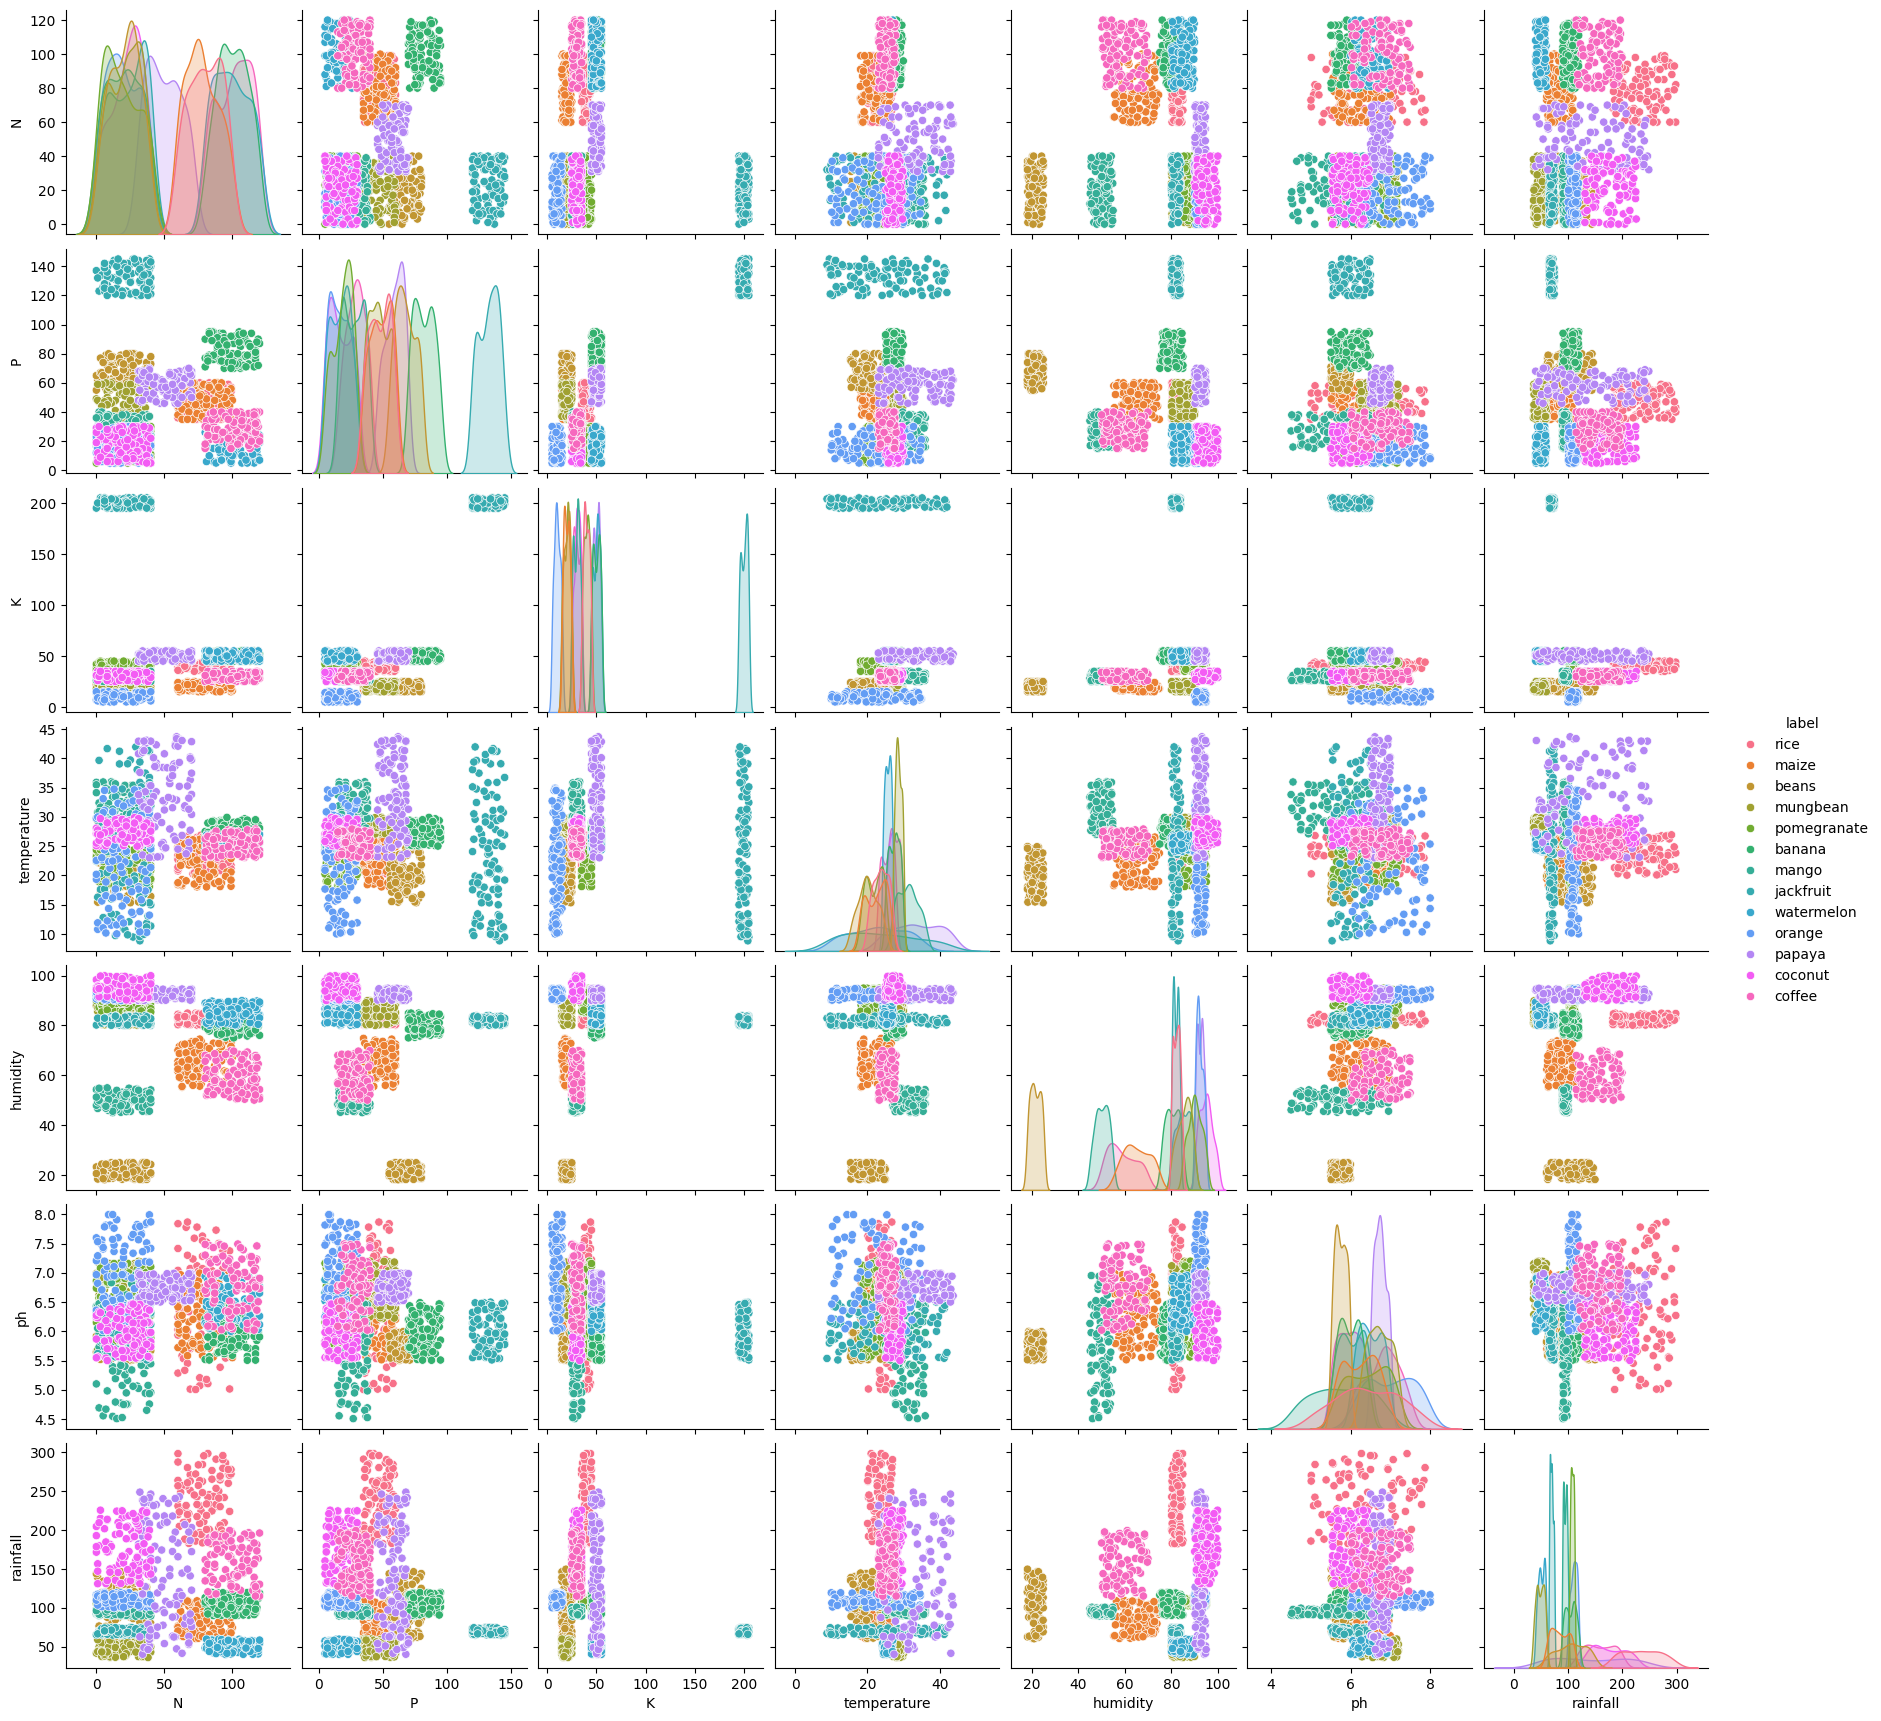

In [13]:
sns.pairplot(data=df, hue='label')

In [14]:
import matplotlib.pyplot as plt

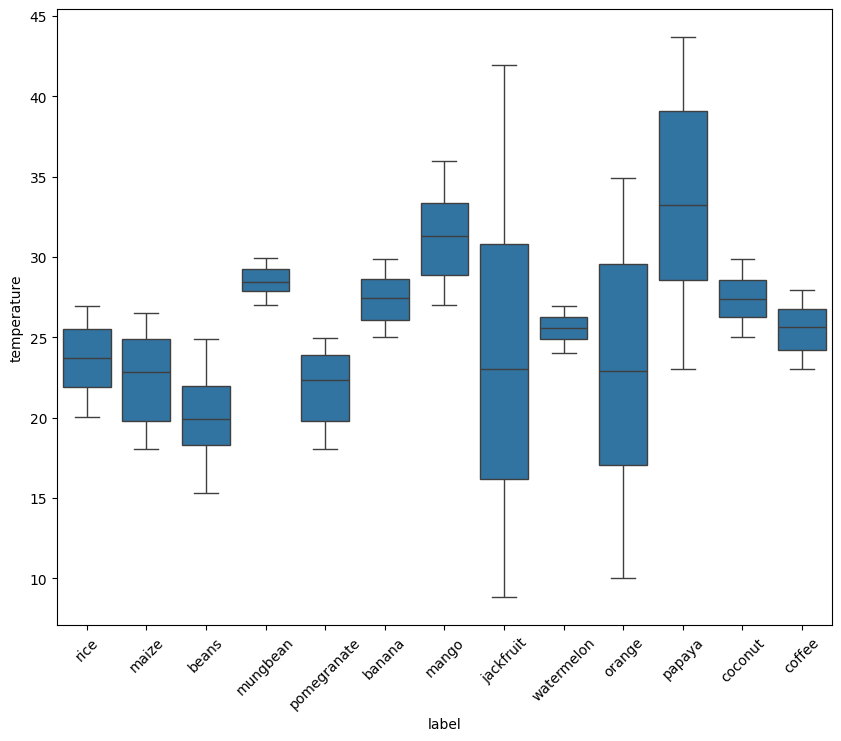

In [15]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='label', y='temperature', data=df)
plt.xticks(rotation=45)
plt.show()

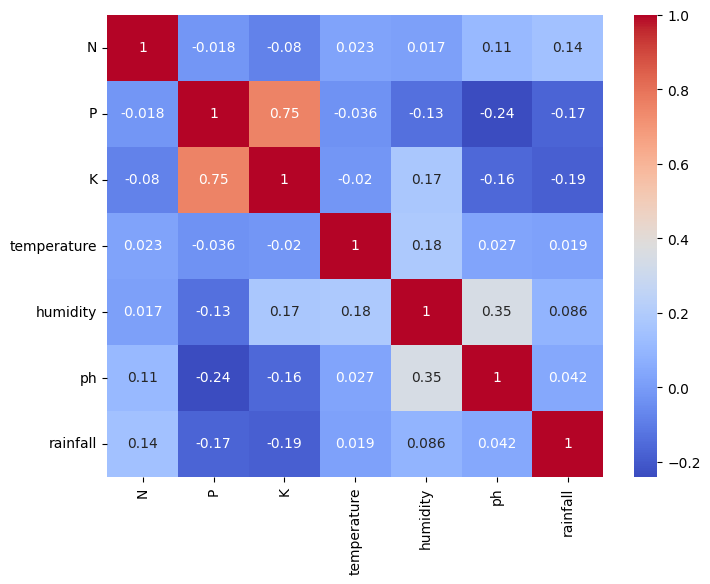

In [16]:
corr = df.drop('label', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

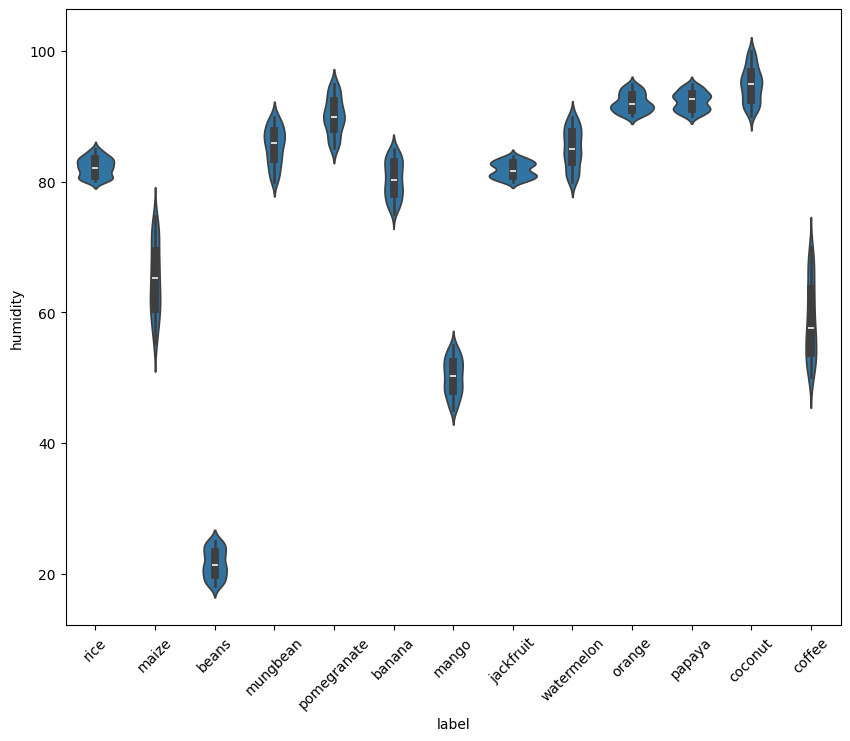

In [17]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='label', y='humidity', data=df)
plt.xticks(rotation=45)
plt.show()

In [19]:
df['label'].unique()

array(['rice', 'maize', 'beans', 'mungbean', 'pomegranate', 'banana',
       'mango', 'jackfruit', 'watermelon', 'orange', 'papaya', 'coconut',
       'coffee'], dtype=object)

In [21]:
df['label'].value_counts()

rice           100
maize          100
beans          100
mungbean       100
pomegranate    100
banana         100
mango          100
jackfruit      100
watermelon     100
orange         100
papaya         100
coconut        100
coffee         100
Name: label, dtype: int64

In [22]:
X = df.drop('label', axis=1)
y = df['label']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        19
       beans       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        13
      coffee       1.00      1.00      1.00        21
   jackfruit       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        27
    mungbean       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00      1.00      1.00        18
 pomegranate       1.00      1.00      1.00        23
        rice       1.00      1.00      1.00        19
  watermelon       1.00      1.00      1.00        26

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



**Modal prediction with sample data**

In [34]:
new_data = {
    'N': [62],
    'P': [58],
    'K': [15],
    'temperature': [20.879744],
    'humidity': [70.002744],
    'ph': [6.502985],
    'rainfall': [202.935536]
}

new_data_df = pd.DataFrame(new_data)

In [35]:
predicted_label = model.predict(new_data_df)
print("Predicted Crop Type:", predicted_label[0])

Predicted Crop Type: maize


In [36]:
import pickle

In [37]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)